This is to do data-postprocess on U-Net.
After running all codes on this page PLEASE do below operation!!!!
1. sort the output csv file by id
2. make sure you have a csv file includes submission ids
3. sort your own submission file by ids
4. paste the rle column from output csv file to your own submission file
5. please make sure path_to_train is the directory of prediction images

In [9]:
from glob import glob
import os

path_to_train = './' #path of the direction which has prediction images
glob_train_imgs = os.path.join(path_to_train, '*_predict.png')

train_img_paths = glob(glob_train_imgs)
# train_mask_paths = glob(glob_train_masks)
print(train_img_paths[:10])
# print(train_mask_paths[:10])

import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


['./943_predict.png', './1155_predict.png', './1405_predict.png', './1283_predict.png', './1823_predict.png', './30_predict.png', './565_predict.png', './1941_predict.png', './598_predict.png', './407_predict.png']


In [10]:
s = './943_predict.png'
print(s[2: -12])

943


ZeroDivisionError: integer division or modulo by zero

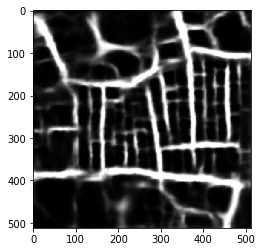

In [15]:
import cv2 as cv
def create_submission(csv_name, predictions, image_ids):
    """
    csv_name -> string for csv ("XXXXXXX.csv")
    predictions -> numpyarray of size (num_examples, height, width)
                In this case (num_examples, 512, 512)
    image_ids -> numpyarray or list of size (num_examples,)
    
    predictions[i] should be the prediction of road for image_id[i]
    """
    sub = pd.DataFrame()
    sub['ImageId'] = image_ids
    encodings = []
    num_images = len(image_ids)
    for i in range(num_images):
        if (i+1) % (num_images//10) == 0:
            print(i, num_images)
        encodings.append(rle_encoding(predictions[i]))
        
    sub['EncodedPixels'] = encodings
    #sub['Height'] = [512]*num_images Nonger needed for DICE Scoring
    #sub['Width'] = [512]*num_images Nonger needed for DICE Scoring
    sub.to_csv(csv_name, index=False)

# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    """
    x = numpyarray of size (height, width) representing the mask of an image
    if x[i,j] == 0:
        image[i,j] is not a road pixel
    if x[i,j] != 0:
        image[i,j] is a road pixel
    """
    dots = np.where(x.T.flatten() != 0)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): 
            run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths


submission = []
idd = []
for path in train_img_paths[:1]:
    img = cv.imread(path,0)
    img = resize(img, (512, 512), mode='constant', preserve_range=True)
    ret,thresh1 = cv.threshold(img,30,1,cv.THRESH_BINARY)
#     mask = imread(path)
#     print(thresh1)
    
    plt.imshow(img, cmap='gray')


#     mask = mask / 33096
#     mask = (mask >= 0.5).astype(float)
#     plt.imshow(mask, cmap='gray')

#     print(mask.shape)
    submission.append(np.array(thresh1))
    idd.append(path[2:-12])
create_submission('result.csv', np.array(submission), idd)
print("finish")